In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress
import scipy.stats as st

In [2]:
# Store filepath in a variable
data = "Resources/data.csv"
data_by_artist = "Resources/data_by_artist.csv"
data_by_genres = "Resources/data_by_genres.csv"
data_by_year = "Resources/data_by_year.csv"
data_w_genres = "Resources/data_w_genres.csv"

In [56]:
data_df = pd.read_csv(data, encoding="ISO-8859-1")
data_by_artist_df = pd.read_csv(data_by_artist, encoding="ISO-8859-1")
data_by_genres_df = pd.read_csv(data_by_genres, encoding="ISO-8859-1")
data_by_year_df = pd.read_csv(data_by_year, encoding="ISO-8859-1")
data_w_genres_df = pd.read_csv(data_w_genres, encoding="ISO-8859-1")

In [113]:
#view data
data_df.head()



,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


In [114]:
list(data_df.columns.values)

['acousticness',
 'artists',
 'danceability',
 'duration_ms',
 'energy',
 'explicit',
 'id',
 'instrumentalness',
 'key',
 'liveness',
 'loudness',
 'mode',
 'name',
 'popularity',
 'release_date',
 'speechiness',
 'tempo',
 'valence',
 'year']

__*The values of the song attributes we evaluated range from 0.0 to 1.0**__


**Acousticness**-
This value denotes the level of not having electrical amplification in a song. A score of 1.0 means the song is most likely to be an acoustic one, no electrical applification.
_____________
**Danceability**-
“Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable”.

______________
**Instrumentalness**-
This value denotes the amount of vocals in the song. The closer it is to 1.0, the more instrumental the song is, no vocals.



In [165]:
# Isolate data related to attributes that we need to measure over time 
required_df = data_df[["year","liveness","acousticness", "instrumentalness", "danceability", "speechiness"]]
required_df


,year,liveness,acousticness,instrumentalness,danceability,speechiness
0,1920,0.3790,0.991000,0.000522,0.598,0.0936
1,1920,0.0809,0.643000,0.026400,0.852,0.0534
2,1920,0.5190,0.993000,0.000018,0.647,0.1740
3,1920,0.1280,0.000173,0.801000,0.730,0.0425
4,1920,0.4020,0.295000,0.000246,0.704,0.0768
...,...,...,...,...,...,...
174384,2020,0.1780,0.009170,0.000060,0.792,0.0356
174385,2021,0.1960,0.795000,0.000000,0.429,0.0360
174386,2020,0.1130,0.806000,0.920000,0.671,0.0282
174387,2021,0.1130,0.920000,0.000000,0.462,0.0377


In [180]:
# Large population, we limited our analysis to 1990 - 2020 
music_years = required_df.query("year>1989").query("year<2021")

music_years

,year,liveness,acousticness,instrumentalness,danceability,speechiness
9071,2008,0.149,0.39400,0.000000,0.484,0.0322
9081,2008,0.163,0.25500,0.000005,0.405,0.0289
9085,2008,0.122,0.40600,0.000000,0.477,0.0300
9087,2018,0.904,0.88700,0.000000,0.319,0.0623
9091,2018,0.683,0.93800,0.000005,0.269,0.0576
...,...,...,...,...,...,...
174380,2020,0.231,0.04840,0.000012,0.693,0.0762
174382,2020,0.253,0.14100,0.000000,0.544,0.2330
174384,2020,0.178,0.00917,0.000060,0.792,0.0356
174386,2020,0.113,0.80600,0.920000,0.671,0.0282


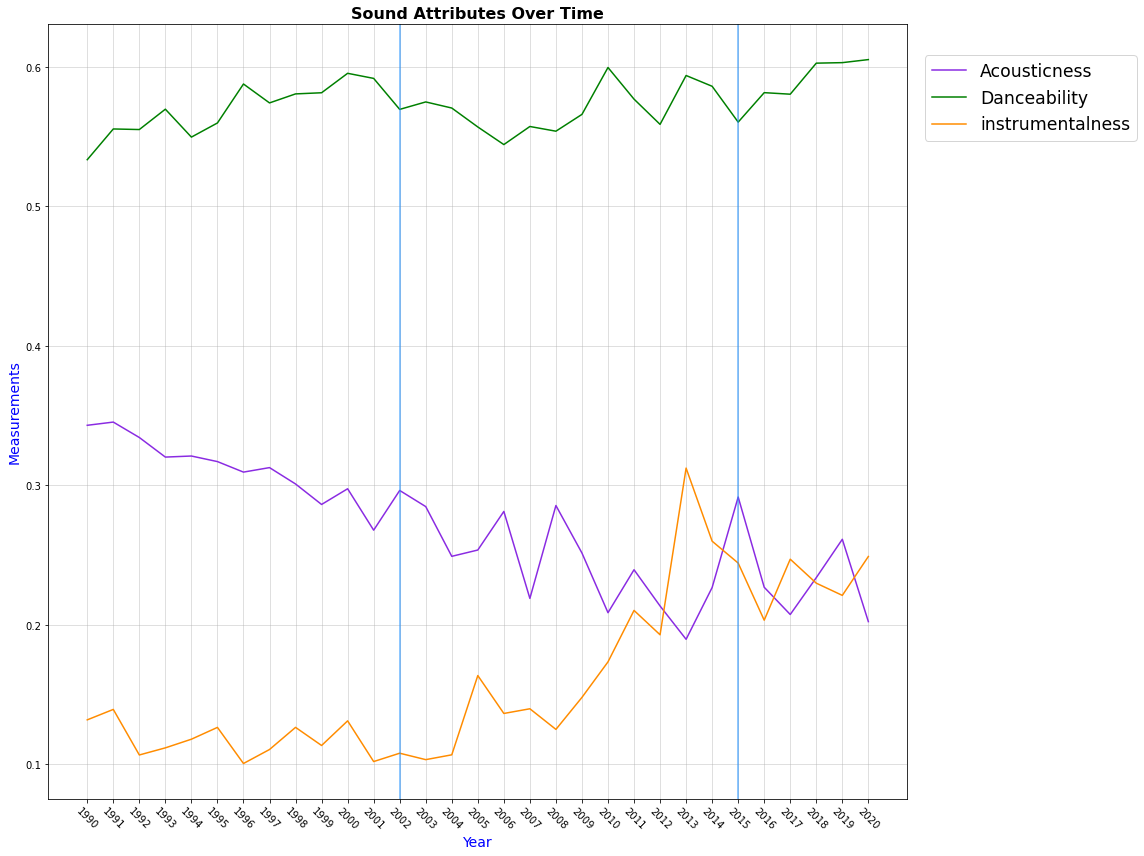

In [199]:
# group the selected attributes by year and calculate the mean
#x_axisl = music_years.groupby('year')['year'].max() <---ended up eliminating liveness
x_axisA = music_years.groupby('year')['year'].max()
x_axisd = music_years.groupby('year')['year'].max()
x_axisi = music_years.groupby('year')['year'].max()
#liveness = music_years.groupby('year')["liveness"].mean() <---ended up eliminating liveness
acousticness = music_years.groupby('year')["acousticness"].mean()
danceability = music_years.groupby('year')["danceability"].mean()
instrumentalness = music_years.groupby('year')["instrumentalness"].mean()

# Plot the line chart and label it
plt.figure(figsize = (16,12))
labels = ["Acousticness","Danceability","instrumentalness"]
#plt.plot(x_axisl, liveness)
plt.plot(x_axisA, acousticness, color = "blueviolet")
plt.plot(x_axisd, danceability, color = "green")
plt.plot(x_axisi, instrumentalness, color = "darkorange")
plt.xlabel("Year", color="blue", fontsize=14)
plt.ylabel("Measurements", color = "blue", fontsize = 14)
plt.grid(True,alpha=.5)
plt.xticks(range(1990,2021,1),rotation=-45)
plt.legend(labels=labels,fontsize="xx-large",loc=(1.02,0),bbox_to_anchor=(1.02,0.85))
plt.axvline(2002,linewidth=2, color='dodgerblue',alpha=.5)
plt.axvline(2015,linewidth=2, color='dodgerblue',alpha=.5)
plt.title("Sound Attributes Over Time",fontweight = "bold", fontsize = 16)

plt.savefig('.\\images\\Sound_Atributes_Over_Time.png',bbox_inches='tight')
plt.tight_layout()
plt.show()